In [497]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import tree
import matplotlib.pyplot as plt

### Loading the data

In [498]:
test_data = pd.read_csv('test_genetic_disorders.csv').dropna()
train_data = pd.read_csv('train_genetic_disorders.csv').dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6370 entries, 8 to 21010
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        6370 non-null   object 
 1   Patient Age                                       6370 non-null   float64
 2   Genes in mother's side                            6370 non-null   object 
 3   Inherited from father                             6370 non-null   object 
 4   Maternal gene                                     6370 non-null   object 
 5   Paternal gene                                     6370 non-null   object 
 6   Blood cell count (mcL)                            6370 non-null   float64
 7   Patient First Name                                6370 non-null   object 
 8   Family Name                                       6370 non-null   object 
 9   Father's name     

In [499]:
train_data['Maternal gene']

8        Yes
9        Yes
12        No
14       Yes
18       Yes
        ... 
20997     No
20998    Yes
20999    Yes
21009     No
21010    Yes
Name: Maternal gene, Length: 6370, dtype: object

### Data Preparing

In [500]:
#convertation str values to number values 
# enc = LabelEncoder()
# x = enc.fit_transform(train_data)
# y = enc.fit_transform(test_data)
labels = train_data["Genetic Disorder"].unique()
test_data = test_data.apply(LabelEncoder().fit_transform)
train_data = train_data.apply(LabelEncoder().fit_transform)


In [501]:
#extract features and target variables
x = train_data[["No. of previous abortion",
                   
                
                    "History of anomalies in previous pregnancies",
               "Status",
               
               "Inherited from father",
               "Maternal gene",
               "Paternal gene"]]
y = train_data["Genetic Disorder"]


#save the feature name and target variables
feature_names = x.columns




In [502]:
x

,No. of previous abortion,History of anomalies in previous pregnancies,Status,Inherited from father,Maternal gene,Paternal gene
8,0,1,0,0,1,0
9,1,1,0,1,1,1
12,0,1,1,1,0,0
14,3,0,0,0,1,0
18,3,1,1,1,1,0
...,...,...,...,...,...,...
20997,1,0,0,1,0,1
20998,4,0,1,1,1,1
20999,2,1,0,0,1,0
21009,1,1,1,0,0,1


In [503]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                 test_size = 0.4)


In [504]:
X_train

,No. of previous abortion,History of anomalies in previous pregnancies,Status,Inherited from father,Maternal gene,Paternal gene
1704,4,0,0,1,1,0
3754,2,1,0,0,1,1
16643,0,1,0,0,1,1
2232,3,0,0,0,1,1
2843,3,1,0,0,0,1
...,...,...,...,...,...,...
10334,4,1,0,0,0,1
12230,3,0,1,0,1,0
2328,1,0,1,0,0,0
16444,2,1,0,0,1,0


### DecisionTreeClassifier

In [505]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [506]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [507]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5051020408163265


In [508]:
labels

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

### Visualizing Decision Trees

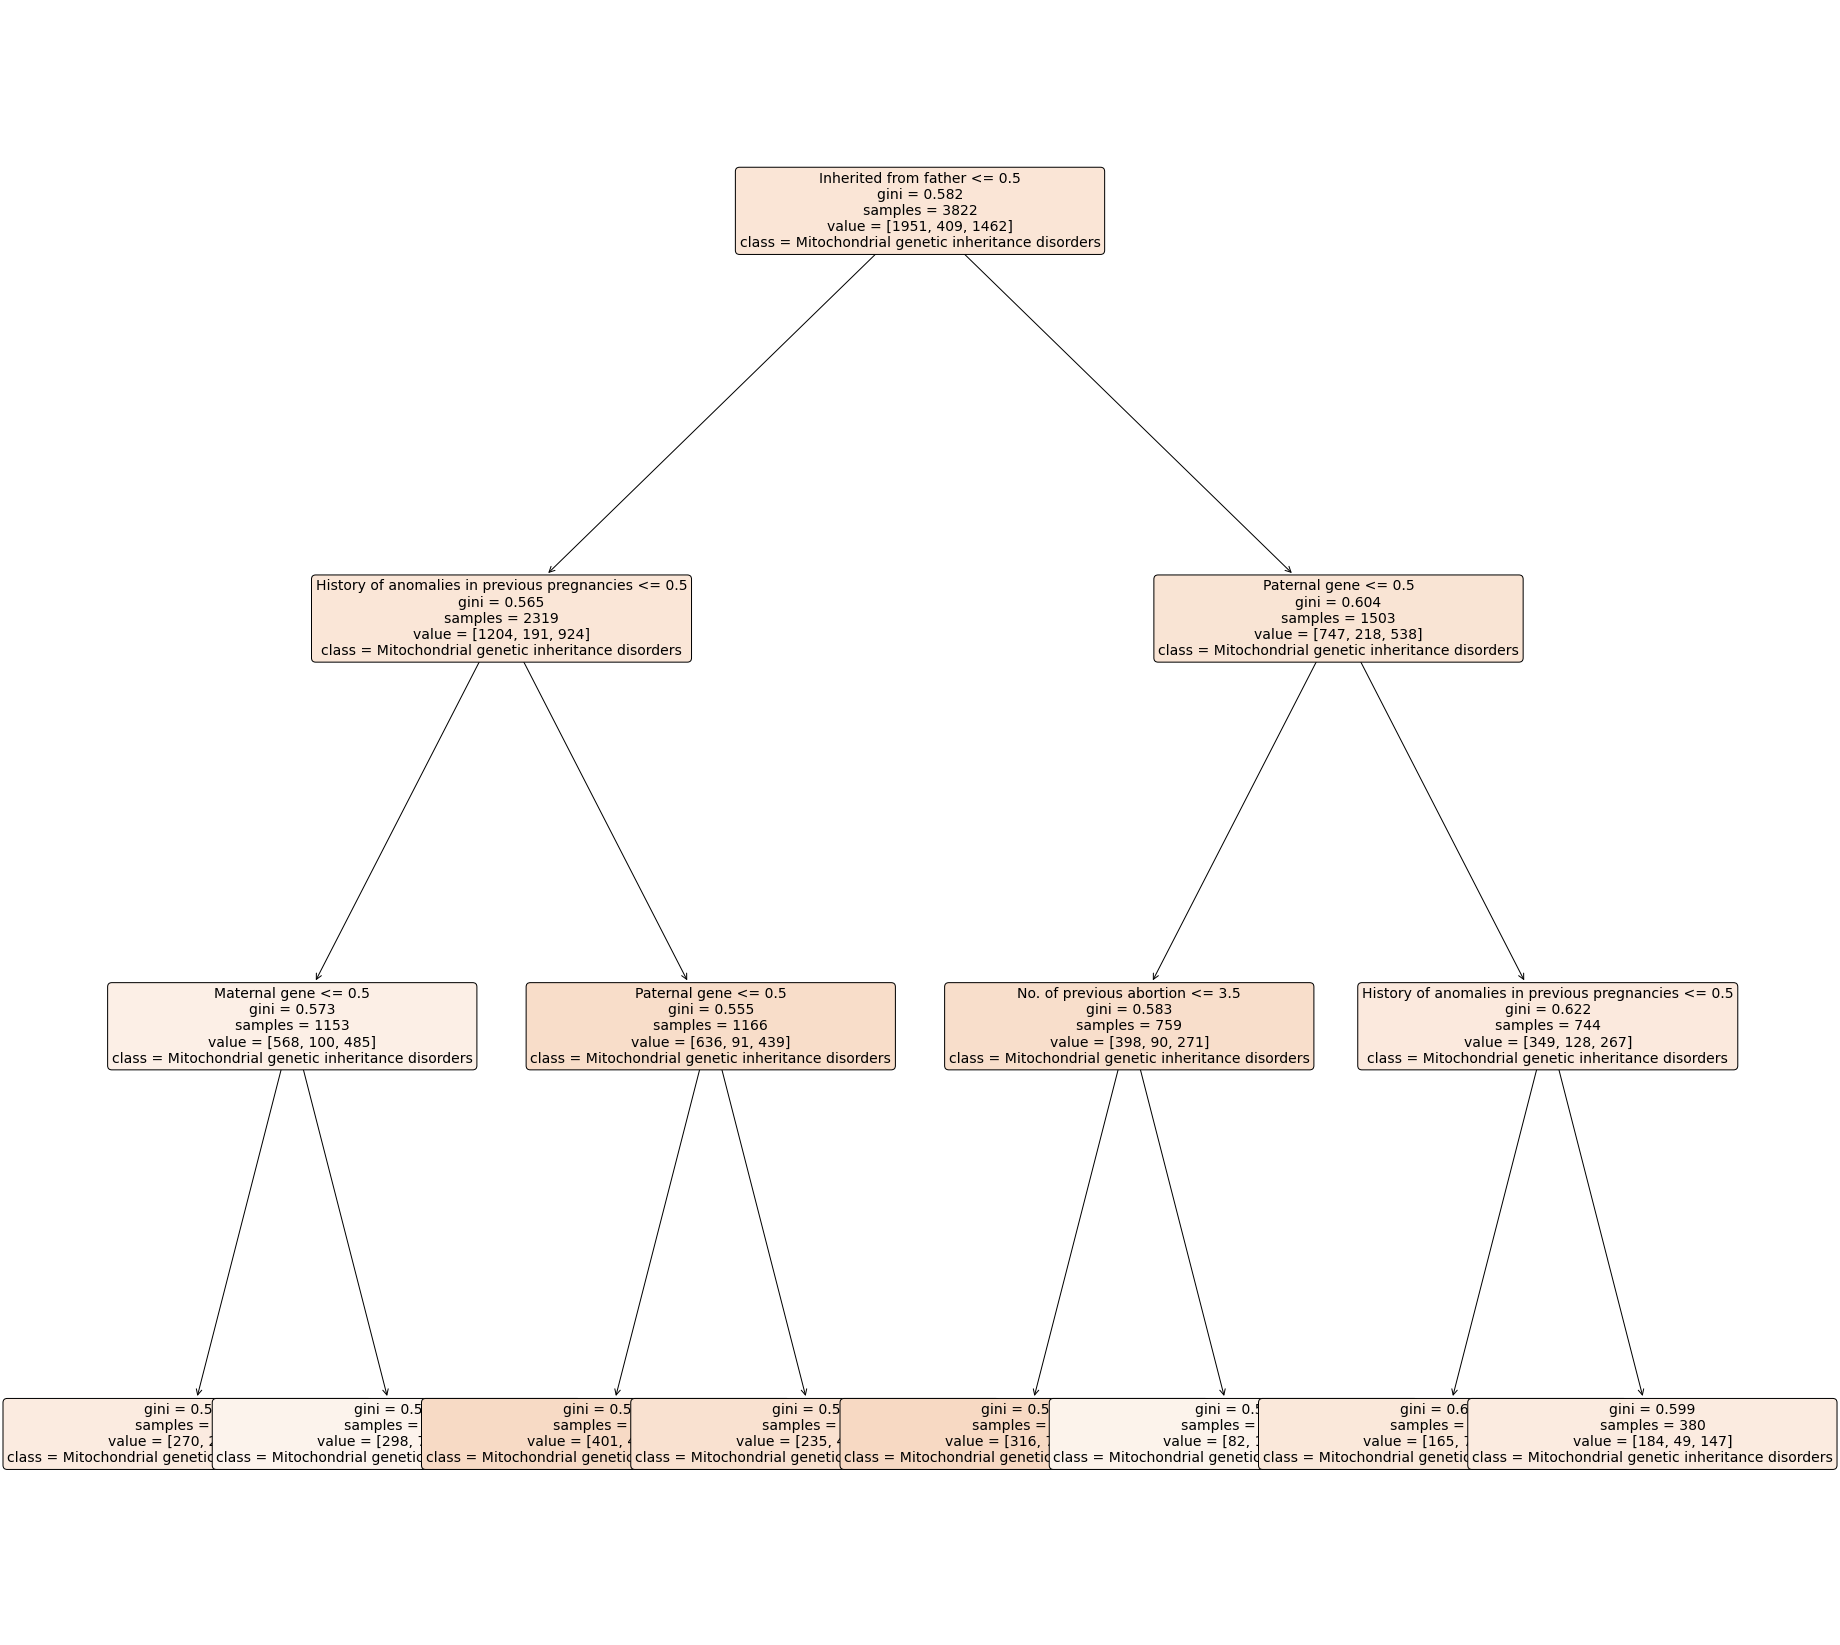

In [509]:
#plt the figure, setting a black background
plt.figure(figsize=(30,30))
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()